In [26]:
from pydataxm import *                          
import datetime as dt
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
#show all columns and rows
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
#stop warnings
import warnings
warnings.filterwarnings('ignore')
objetoAPI = pydataxm.ReadDB()

df = objetoAPI.get_collections()
#filter where Entity is 'Recurso'
df = df[df['Entity'] == 'Recurso']

df

,MetricId,MetricName,Entity,MaxDays,Type,Url,Filter,MetricUnits,MetricDescription
8,ConsCombustibleMBTU,Consumo Combustible MBTU por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,MBTU,Los generadores térmicos deben reportar diaria...
9,Gene,Generación por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generacion neta de cada una de las plantas Nac...
10,IndRecMargina,Indicador Recurso Margina por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,#,Si Precio de Oferta Declarado = Máximo Precio ...
12,PrecOferDesp,Precio de Oferta de Despacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,COP/kWh,Es el precio de la energia de un recurso de ge...
20,GeneIdea,Generación Ideal por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion que resulta de consider...
25,EmisionesCO2Eq,Emisiones de CO2 Eq por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,gCO2e/kWh,Emisiones totales de Dióxido de Carbono. Para ...
34,GeneSeguridad,Generación de Seguridad por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación que se requiere para garantizar con...
35,GeneFueraMerito,Generación Fuera de Mérito por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación forzada requerida para suplir las R...
37,GeneProgDesp,Generación Programada por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Despacho de generacion esperado de las central...
38,GeneProgRedesp,Generación Programada Redespacho por Recurso,Recurso,31,HourlyEntities,http://servapibi.xm.com.co/hourly,Codigo Submercado Generación,kWh,Generación programada del redespacho


# Getting data from Listado_Recursos_Generacion.xlsx and sorting it per type
## Just fill in the year in the block below and then it will gather all the data trough the api, a full year takes 7-8 minutes to download

In [27]:
# TEKSTTTTTT dit moet ik nog fixen en dan filteren zodat alle data van 1 maand opgedeeld is volgens het type plant. Daarna itereren over 60 maanden en opslaan in excel.
df_generation_plants = pd.read_excel('Listado_Recursos_Generacion.xlsx',skiprows=3)
df_hydro_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='HIDRAULICA']
df_solar_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='SOLAR']
df_wind_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='EOLICA']
df_thermal_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='TERMICA']
df_cogen_plants = df_generation_plants[df_generation_plants['Tipo Generación']=='COGENERADOR']


plants_hydro = {}
plants_solar = {}
plants_wind = {}
plants_thermal = {}
plants_cogen = {}
plants = {}
for i, row in df_generation_plants.iterrows():
    plants[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_hydro_plants.iterrows():
    plants_hydro[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_solar_plants.iterrows():
    plants_solar[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_wind_plants.iterrows():
    plants_wind[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_thermal_plants.iterrows():
    plants_thermal[row['Código SIC']] = row['Nombre Recurso']

for i, row in df_cogen_plants.iterrows():
    plants_cogen[row['Código SIC']] = row['Nombre Recurso']

print("All:  ",len(plants))
print("Hydro:  ",len(plants_hydro))
print("Solar:  ",len(plants_solar))
print("Wind:  ",len(plants_wind))
print("Thermal:  ",len(plants_thermal))
print("Cogen:  ",len(plants_cogen))



All:   339
Hydro:   167
Solar:   51
Wind:   3
Thermal:   99
Cogen:   19


In [29]:
#start timer
THIS WORKS
start_time = dt.datetime.now()
solar = pd.DataFrame()
wind = pd.DataFrame()
hydro = pd.DataFrame()
thermal = pd.DataFrame()
cogen = pd.DataFrame()

df_list = [solar, wind, hydro, thermal, cogen]

change_variable = False
definitive_thermal = pd.DataFrame()
definitive_solar = pd.DataFrame()
definitive_wind = pd.DataFrame()
definitive_hydro = pd.DataFrame()
definitive_cogen = pd.DataFrame()


months = 67
start_year = 2018
start_date = dt.datetime(start_year, 1, 1)
start_list = [start_date + relativedelta(months=i) for i in range(0, months)] 
end_list = [start_date + relativedelta(months=i+1, days=-1) for i in range(0, months)]
print(end_list[-1])
for index, start in enumerate(start_list):
    #difference from start_time
    difference = dt.datetime.now() - start_time
    if difference.seconds >600:
        print("reset connection")
        objetoAPI = pydataxm.ReadDB()
        start_time = dt.datetime.now() #reset timer
    else:
        pass
    print("Done months:    ,", index, " of ", len(start_list))
    start_date = start_list[index]
    end_date = end_list[index]
    df =objetoAPI.get_collections(i) 
    
    print('-------------------')
    df_plant = objetoAPI.request_data(
                "Gene",           
                "Recurso",             
                start_date.date(),  
                end_date.date())
    
    solar = solar.append(df_plant[df_plant['Values_code'].isin(list(plants_solar.keys()))])
    solar.fillna(0, inplace=True)
    wind = wind.append(df_plant[df_plant['Values_code'].isin(list(plants_wind.keys()))])
    wind.fillna(0, inplace=True)
    hydro = hydro.append(df_plant[df_plant['Values_code'].isin(list(plants_hydro.keys()))])
    hydro.fillna(0, inplace=True)
    thermal = thermal.append(df_plant[df_plant['Values_code'].isin(list(plants_thermal.keys()))])
    thermal.fillna(0, inplace=True)
    cogen = cogen.append(df_plant[df_plant['Values_code'].isin(list(plants_cogen.keys()))])
    cogen.fillna(0, inplace=True)

    thermal['Values_code'] = thermal['Values_code'].replace(plants_thermal)
    thermal.drop(['Id'], axis=1, inplace=True)

    for i in thermal['Values_code'].unique():
        temp_thermal = thermal[thermal['Values_code'] == i].copy()
        
        temp_thermal = pd.melt(temp_thermal, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_thermal['Timestamp'] = pd.to_datetime(temp_thermal['Date']) + pd.to_timedelta(temp_thermal['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_thermal.drop(columns=['Date', 'Hour'], inplace=True)
        temp_thermal.rename(columns={'Values_code': i}, inplace=True)
        
        if definitive_thermal.empty:
            definitive_thermal = temp_thermal
        else:
            definitive_thermal = definitive_thermal.merge(temp_thermal, on='Timestamp', how='outer') # check
            definitive_thermal.sort_values(by=['Timestamp'], inplace=True)

    for i in solar['Values_code'].unique():
        temp_solar = solar[solar['Values_code'] == i].copy()

        temp_solar = pd.melt(temp_solar, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_solar['Timestamp'] = pd.to_datetime(temp_solar['Date']) + pd.to_timedelta(temp_solar['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_solar.drop(columns=['Date', 'Hour'], inplace=True)
        temp_solar.rename(columns={'Values_code': i}, inplace=True)
        
        if definitive_solar.empty:
            definitive_solar = temp_solar
        else:
            definitive_solar = definitive_solar.merge(temp_solar, on='Timestamp', how='outer') #check
            definitive_solar.sort_values(by=['Timestamp'], inplace=True)

    for i in wind['Values_code'].unique():
        temp_wind = wind[wind['Values_code'] == i].copy()

        temp_wind = pd.melt(temp_wind, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_wind['Timestamp'] = pd.to_datetime(temp_wind['Date']) + pd.to_timedelta(temp_wind['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_wind.drop(columns=['Date', 'Hour'], inplace=True)
        temp_wind.rename(columns={'Values_code': i}, inplace=True)

        if definitive_wind.empty:
            definitive_wind = temp_wind
        else:
            definitive_wind = definitive_wind.merge(temp_wind, on='Timestamp', how='outer') #check
            definitive_wind.sort_values(by=['Timestamp'], inplace=True)
    
    for i in hydro['Values_code'].unique():
        temp_hydro = hydro[hydro['Values_code'] == i].copy()

        temp_hydro = pd.melt(temp_hydro, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_hydro['Timestamp'] = pd.to_datetime(temp_hydro['Date']) + pd.to_timedelta(temp_hydro['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_hydro.drop(columns=['Date', 'Hour'], inplace=True)
        temp_hydro.rename(columns={'Values_code': i}, inplace=True)

        if definitive_hydro.empty:
            definitive_hydro = temp_hydro
        else:
            definitive_hydro = definitive_hydro.merge(temp_hydro, on='Timestamp', how='outer') #check
            definitive_hydro.sort_values(by=['Timestamp'], inplace=True)
    
    for i in cogen['Values_code'].unique():
        temp_cogen = cogen[cogen['Values_code'] == i].copy()

        temp_cogen = pd.melt(temp_cogen, id_vars=['Date'], value_vars=[f'Values_Hour{i:02d}' for i in range(1, 24)], var_name='Hour', value_name=i)
        temp_cogen['Timestamp'] = pd.to_datetime(temp_cogen['Date']) + pd.to_timedelta(temp_cogen['Hour'].str.split('Hour').str[-1].astype(int), unit='h')
        temp_cogen.drop(columns=['Date', 'Hour'], inplace=True)
        temp_cogen.rename(columns={'Values_code': i}, inplace=True)

        if definitive_cogen.empty:
            definitive_cogen = temp_cogen
        else:
            definitive_cogen = definitive_cogen.merge(temp_cogen, on='Timestamp', how='outer') #check
            definitive_cogen.sort_values(by=['Timestamp'], inplace=True)

#set indexes
definitive_solar.set_index('Timestamp', inplace=True)
definitive_wind.set_index('Timestamp', inplace=True)
definitive_hydro.set_index('Timestamp', inplace=True)
definitive_thermal.set_index('Timestamp', inplace=True)
definitive_cogen.set_index('Timestamp', inplace=True)
#set nan to 0
definitive_solar.fillna(0, inplace=True)
definitive_wind.fillna(0, inplace=True)
definitive_hydro.fillna(0, inplace=True)
definitive_thermal.fillna(0, inplace=True)
definitive_cogen.fillna(0, inplace=True)

#add a total production column
definitive_solar['Total[kW]'] = definitive_solar.sum(axis=1)
definitive_wind['Total[kW]'] = definitive_wind.sum(axis=1)
definitive_hydro['Total[kW]'] = definitive_hydro.sum(axis=1)
definitive_thermal['Total[kW]'] = definitive_thermal.sum(axis=1)
definitive_cogen['Total[kW]'] = definitive_cogen.sum(axis=1)

definitive_production_df_list = [definitive_solar, definitive_wind, definitive_hydro, definitive_thermal, definitive_cogen]
definitive_thermal.head()
# solar, wind, hydro, thermal, cogen

2023-07-31 00:00:00
Done months:    , 0  of  67
-------------------
Done months:    , 1  of  67
-------------------
Done months:    , 2  of  67
-------------------
Done months:    , 3  of  67
-------------------
Done months:    , 4  of  67
-------------------
Done months:    , 5  of  67
-------------------
Done months:    , 6  of  67
-------------------
Done months:    , 7  of  67
-------------------
Done months:    , 8  of  67
-------------------
Done months:    , 9  of  67
-------------------
Done months:    , 10  of  67
-------------------
Done months:    , 11  of  67
-------------------
Done months:    , 12  of  67
-------------------
Done months:    , 13  of  67
-------------------
Done months:    , 14  of  67
-------------------
reset connection
Done months:    , 15  of  67
-------------------
reset connection
Done months:    , 16  of  67
-------------------
reset connection
Done months:    , 17  of  67
-------------------
reset connection
Done months:    , 18  of  67
-----------

KeyboardInterrupt: 

In [17]:
definitive_solar

,2TYI_x,Timestamp,2TYI_y,2TYI_x,2TYI_y,2TYI_x,2TYI_y,2TYI_x,2TYI_y,2TYI_x,...,EPFV_y,2ZHY_y,2ZP9_y,3A44_x,2TYI_y,2VJS_y,EPFV,2ZHY,2ZP9,3A44_y
0,0.0,2018-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,0.0,2018-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,0.0,2018-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,0.0,2018-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
4,0.0,2018-01-01 05:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23800,NaN,2020-10-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
23801,NaN,2020-10-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
23802,NaN,2020-10-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
23803,NaN,2020-10-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
definitive_wind

,JPR1_x,Timestamp,JPR1_y,JPR1_x,JPR1_y,JPR1_x,JPR1_y,JPR1_x,JPR1_y,JPR1_x,...,JPR1_x,JPR1_y,JPR1_x,JPR1_y,JPR1_x,JPR1_y,JPR1_x,JPR1_y,JPR1_x,JPR1_y
0,690.92,2018-01-01 01:00:00,690.92,690.92,690.92,690.92,690.92,690.92,690.92,690.92,...,690.92,690.92,690.92,690.92,690.92,690.92,690.92,690.92,690.92,690.92
1,335.34,2018-01-01 02:00:00,335.34,335.34,335.34,335.34,335.34,335.34,335.34,335.34,...,335.34,335.34,335.34,335.34,335.34,335.34,335.34,335.34,335.34,335.34
2,412.36,2018-01-01 03:00:00,412.36,412.36,412.36,412.36,412.36,412.36,412.36,412.36,...,412.36,412.36,412.36,412.36,412.36,412.36,412.36,412.36,412.36,412.36
3,314.29,2018-01-01 04:00:00,314.29,314.29,314.29,314.29,314.29,314.29,314.29,314.29,...,314.29,314.29,314.29,314.29,314.29,314.29,314.29,314.29,314.29,314.29
4,119.98,2018-01-01 05:00:00,119.98,119.98,119.98,119.98,119.98,119.98,119.98,119.98,...,119.98,119.98,119.98,119.98,119.98,119.98,119.98,119.98,119.98,119.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18735,NaN,2020-10-31 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
18766,NaN,2020-10-31 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
18797,NaN,2020-10-31 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
18828,NaN,2020-10-31 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [19]:
definitive_hydro.head()

,2QBW_x,Timestamp,2QEK_x,2QRL_x,2QV2_x,2R22_x,2S6U_x,2S78_x,2S8N_x,2S8U_x,...,2UX3_y,2UR5_y,IQU2,HMIN_y,2WC5,INT1_y,2YIR_y,2YNA_y,2ZCF_y,SRA1
0,13449.18,2018-01-01 01:00:00,35112.61,590.97,19033.2,17979.0,3340.34,96.69,5159.0,1381.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13492.17,2018-01-01 02:00:00,35106.67,591.99,19015.2,17978.0,3344.06,96.56,4849.0,1388.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13402.75,2018-01-01 03:00:00,35120.64,592.53,19022.4,17981.0,3350.82,96.56,4886.0,1383.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13371.79,2018-01-01 04:00:00,35113.64,593.67,19022.4,17983.0,3349.17,96.36,7971.0,1383.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13316.85,2018-01-01 05:00:00,35113.64,593.28,19026.0,17977.0,3351.32,96.16,9599.0,1388.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
definitive_thermal.head()

,AUTOG ARGOS YUMBO_x,Timestamp,AUTOG REFICAR_x,DOÑA JUANA_x,TEQUENDAMA BIOGAS_x,TERMOMECHERO 5_x,AUTOG ARGOS CARTAGENA_x,CIMARRON_x,EL MORRO 1_x,EL MORRO 2_x,...,AUTOG FAMILIA,TERMOCAPACHOS,AGPE - ECOPETROL LA HORMIGA,AUTOG CDS TM2500,AUTOG TERMOSURIA,AUTOG ECOPETROL ORITO,AUTOG FERTICOL_y,AUTOG TURGAS_y,TERMOYOPAL G3_y,TERMOYOPAL G4_y
0,0.0,2018-01-01 01:00:00,8000.0,540.00,7.8,18747.27,7400.0,18908.93,19783.58,19132.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,2018-01-01 02:00:00,8000.0,540.48,0.0,18746.36,2610.0,18845.04,19805.92,19074.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,2018-01-01 03:00:00,7520.0,540.60,0.0,18745.50,3020.0,18945.11,19802.57,19160.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,2018-01-01 04:00:00,7360.0,540.84,0.0,18747.51,2750.0,19035.32,19802.70,19211.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,2018-01-01 05:00:00,7120.0,540.84,0.0,18749.98,8020.0,18998.40,19797.79,19234.14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
definitive_cogen.head()

,2SXQ_x,Timestamp,PNC1_x,PPN1_x,CGM1_x,CIP1_x,CIS1_x,IRG1_x,PIC1_x,ILC1_x,...,IRG1_y,PIC1_y,ILC1_y,MAN1_y,CTMO_y,INC1_y,CAS1_y,RPL1_y,CLTJ_y,2UP2_y
0,11229.39,2018-01-01 01:00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16010.01,2018-01-01 02:00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12868.47,2018-01-01 03:00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12610.87,2018-01-01 04:00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18727.49,2018-01-01 05:00:00,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.


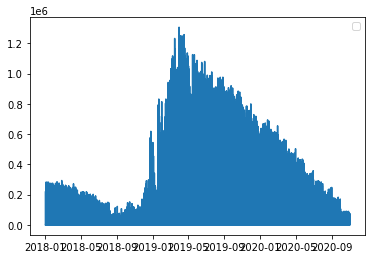

No handles with labels found to put in legend.


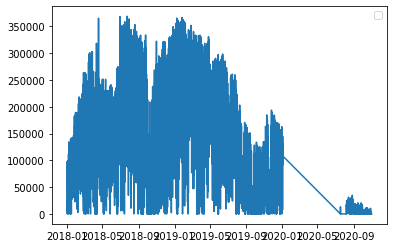

No handles with labels found to put in legend.


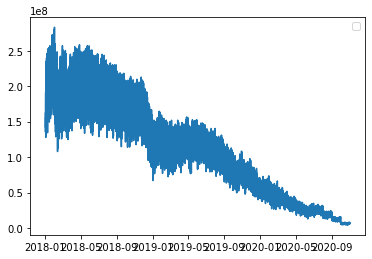

No handles with labels found to put in legend.


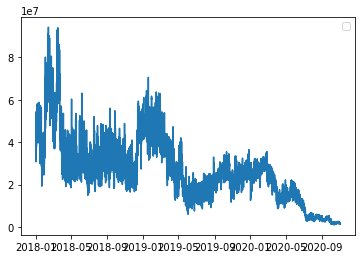

No handles with labels found to put in legend.


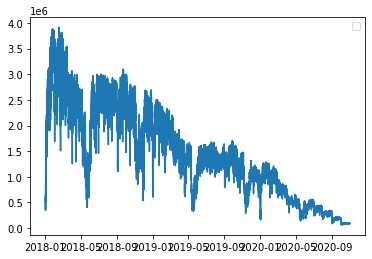

In [23]:
definitive_solar.set_index('Timestamp', inplace=True)
definitive_wind.set_index('Timestamp', inplace=True)
definitive_hydro.set_index('Timestamp', inplace=True)
definitive_thermal.set_index('Timestamp', inplace=True)
definitive_cogen.set_index('Timestamp', inplace=True)
#set nan to 0
definitive_solar.fillna(0, inplace=True)
definitive_wind.fillna(0, inplace=True)
definitive_hydro.fillna(0, inplace=True)
definitive_thermal.fillna(0, inplace=True)
definitive_cogen.fillna(0, inplace=True)

#add a total production column
definitive_solar['Total[kW]'] = definitive_solar.sum(axis=1)
definitive_wind['Total[kW]'] = definitive_wind.sum(axis=1)
definitive_hydro['Total[kW]'] = definitive_hydro.sum(axis=1)
definitive_thermal['Total[kW]'] = definitive_thermal.sum(axis=1)
definitive_cogen['Total[kW]'] = definitive_cogen.sum(axis=1)

definitive_production_df_list = [definitive_solar, definitive_wind, definitive_hydro, definitive_thermal, definitive_cogen]
definitive_thermal.head()

for df in definitive_production_df_list:
    plt.plot(df.index, df['Total[kW]'])
    plt.legend()
    plt.show()

# solar, wind, hydro, thermal, cogen


In [25]:
# export all definitive_production_df_list df's to csv
# solar, wind, hydro, thermal, cogen
for i in range(len(definitive_production_df_list)):
    print(i)
    if i == 0:
        type = 'solar'
    elif i == 1:
        type = 'wind'
    elif i == 2:
        type = 'hydro'
    elif i == 3:
        type = 'thermal'
    elif i == 4:
        type = 'cogen'
    definitive_production_df_list[i].to_csv('definitive_production_df_list_'+type+'_'+str(start_year)+'_34m.csv')




0
1
2
3
4


No handles with labels found to put in legend.


                     2TYI_x  2TYI_y  2TYI_x  2TYI_y  2TYI_x  2TYI_y  2TYI_x  \
Timestamp                                                                     
2018-01-01 01:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 02:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 03:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 04:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 05:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                     ...     ...     ...     ...     ...     ...     ...   
2020-10-31 19:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 20:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 21:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 22:00:00     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 23:00:00     0.0     0.0     0.0     0.0 

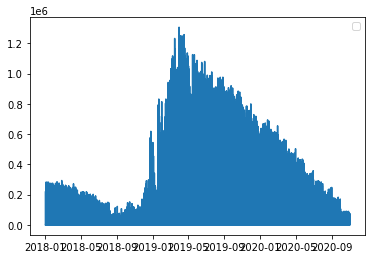

No handles with labels found to put in legend.


                     JPR1_x  JPR1_y  JPR1_x  JPR1_y  JPR1_x  JPR1_y  JPR1_x  \
Timestamp                                                                     
2018-01-01 01:00:00  690.92  690.92  690.92  690.92  690.92  690.92  690.92   
2018-01-01 02:00:00  335.34  335.34  335.34  335.34  335.34  335.34  335.34   
2018-01-01 03:00:00  412.36  412.36  412.36  412.36  412.36  412.36  412.36   
2018-01-01 04:00:00  314.29  314.29  314.29  314.29  314.29  314.29  314.29   
2018-01-01 05:00:00  119.98  119.98  119.98  119.98  119.98  119.98  119.98   
...                     ...     ...     ...     ...     ...     ...     ...   
2020-10-31 19:00:00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2020-10-31 20:00:00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2020-10-31 21:00:00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2020-10-31 22:00:00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
2020-10-31 23:00:00    0.00    0.00    0.00    0.00 

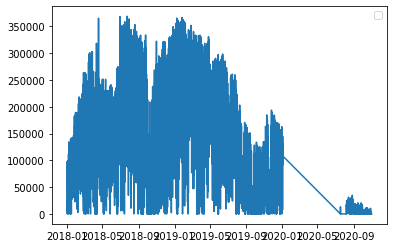

No handles with labels found to put in legend.


                       2QBW_x    2QEK_x  2QRL_x   2QV2_x   2R22_x   2S6U_x  \
Timestamp                                                                    
2018-01-01 01:00:00  13449.18  35112.61  590.97  19033.2  17979.0  3340.34   
2018-01-01 02:00:00  13492.17  35106.67  591.99  19015.2  17978.0  3344.06   
2018-01-01 03:00:00  13402.75  35120.64  592.53  19022.4  17981.0  3350.82   
2018-01-01 04:00:00  13371.79  35113.64  593.67  19022.4  17983.0  3349.17   
2018-01-01 05:00:00  13316.85  35113.64  593.28  19026.0  17977.0  3351.32   
...                       ...       ...     ...      ...      ...      ...   
2020-10-31 19:00:00      0.00      0.00    0.00      0.0      0.0     0.00   
2020-10-31 20:00:00      0.00      0.00    0.00      0.0      0.0     0.00   
2020-10-31 21:00:00      0.00      0.00    0.00      0.0      0.0     0.00   
2020-10-31 22:00:00      0.00      0.00    0.00      0.0      0.0     0.00   
2020-10-31 23:00:00      0.00      0.00    0.00      0.0      0.

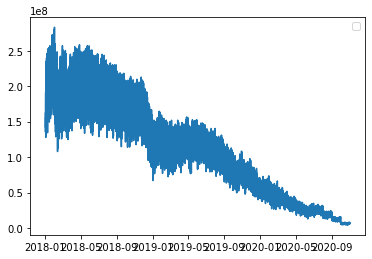

No handles with labels found to put in legend.


                     AUTOG ARGOS YUMBO_x  AUTOG REFICAR_x  DOÑA JUANA_x  \
Timestamp                                                                 
2018-01-01 01:00:00                  0.0           8000.0        540.00   
2018-01-01 02:00:00                  0.0           8000.0        540.48   
2018-01-01 03:00:00                  0.0           7520.0        540.60   
2018-01-01 04:00:00                  0.0           7360.0        540.84   
2018-01-01 05:00:00                  0.0           7120.0        540.84   
...                                  ...              ...           ...   
2020-10-31 19:00:00                  0.0              0.0          0.00   
2020-10-31 20:00:00                  0.0              0.0          0.00   
2020-10-31 21:00:00                  0.0              0.0          0.00   
2020-10-31 22:00:00                  0.0              0.0          0.00   
2020-10-31 23:00:00                  0.0              0.0          0.00   

                     TEQ

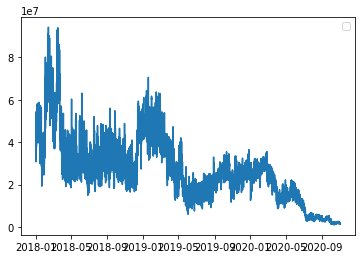

No handles with labels found to put in legend.


                       2SXQ_x  PNC1_x  PPN1_x  CGM1_x  CIP1_x  CIS1_x  IRG1_x  \
Timestamp                                                                       
2018-01-01 01:00:00  11229.39     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 02:00:00  16010.01     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 03:00:00  12868.47     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 04:00:00  12610.87     0.0     0.0     0.0     0.0     0.0     0.0   
2018-01-01 05:00:00  18727.49     0.0     0.0     0.0     0.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
2020-10-31 19:00:00      0.00     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 20:00:00      0.00     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 21:00:00      0.00     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 22:00:00      0.00     0.0     0.0     0.0     0.0     0.0     0.0   
2020-10-31 23:00:00      0.0

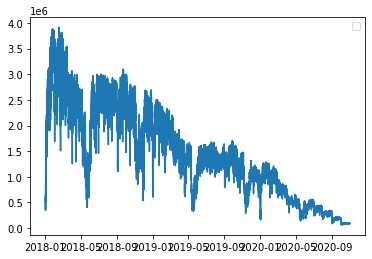

In [24]:
for df in definitive_production_df_list:
    plt.plot(df.index, df['Total[kW]'])
    #print df name of df
    print(df)
    
    plt.legend()
    plt.show()